In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats
plt.style.use('ggplot')
%matplotlib inline
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
train = pd.read_csv("./bike-sharing-demand/train.csv",parse_dates=["datetime"])
test = pd.read_csv("./bike-sharing-demand/test.csv",parse_dates=["datetime"])

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [4]:
train.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
train["season"].value_counts()
    

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

In [6]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [23]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train.info()
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["minute"] = test["datetime"].dt.minute
test["second"] = test["datetime"].dt.second

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

[Text(0, 0.5, 'chour'), Text(0.5, 1.0, 'per hour')]

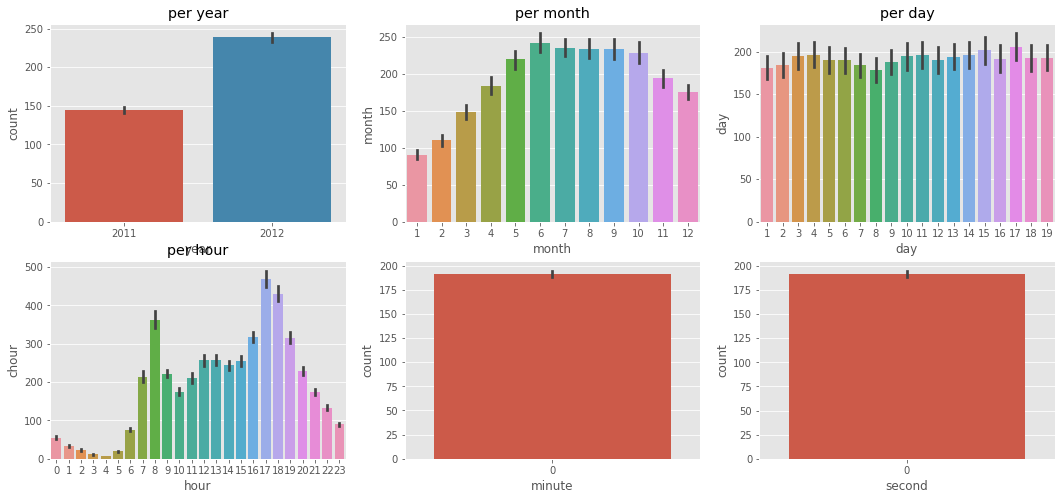

In [8]:
figure, ((ax1, ax2, ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)
sns.barplot(data=train, x="day", y="count", ax=ax3)
sns.barplot(data=train, x="hour", y="count", ax=ax4)
sns.barplot(data=train, x="minute", y="count", ax=ax5)
sns.barplot(data=train, x="second", y="count", ax=ax6)

ax1.set(ylabel="count", title="per year")
ax2.set(ylabel="month", title="per month")
ax3.set(ylabel="day", title="per day")
ax4.set(ylabel="chour", title="per hour")




[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'workingday'),
 Text(0.5, 1.0, 'total rent')]

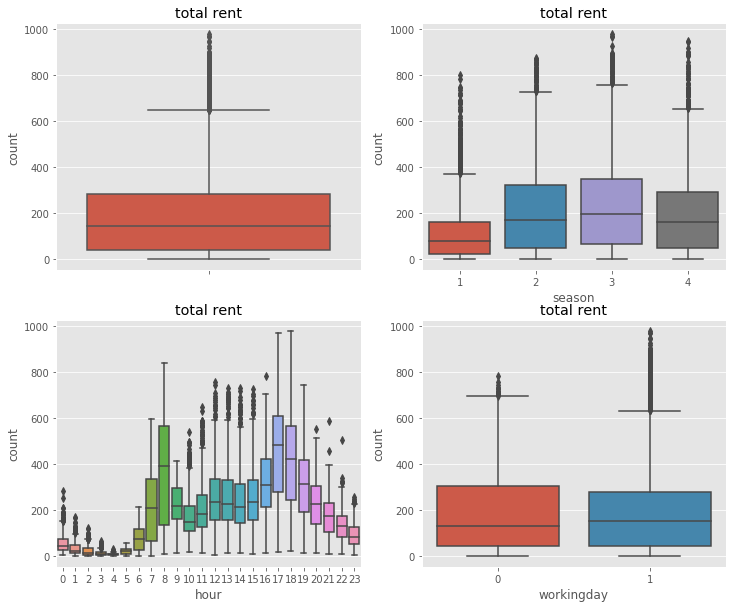

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,10)
sns.boxplot(data=train,y="count",ax=axes[0][0])
sns.boxplot(data=train,y="count",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=train,y="count",x="hour",ax=axes[1][0])
sns.boxplot(data=train,y="count",x="workingday",ax=axes[1][1])

axes[0][0].set(ylabel="count",title="total rent")
axes[0][1].set(xlabel="season",ylabel="count",title="total rent")
axes[1][0].set(ylabel="count",xlabel="hour",title="total rent")
axes[1][1].set(ylabel="count",xlabel="workingday",title="total rent")


In [10]:
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape
test["dayofweek"] = test["datetime"].dt.dayofweek
test.shape

(6493, 10)

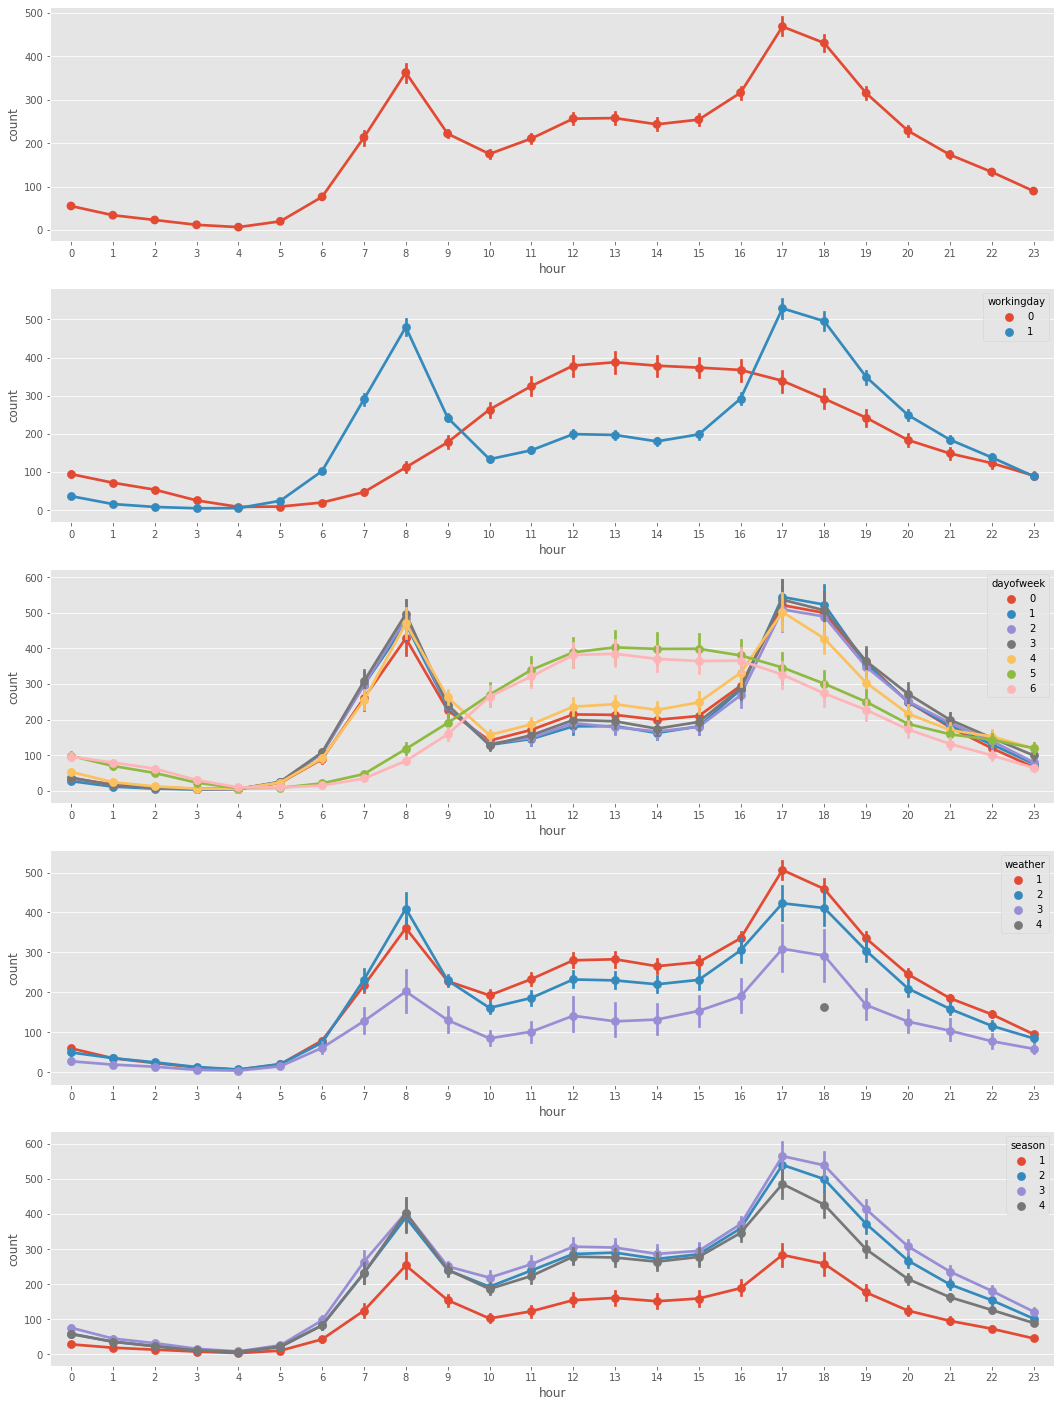

In [11]:
fig, axes = plt.subplots(nrows=5)
fig.set_size_inches(18,25)
sns.pointplot(data=train,x="hour",y="count",ax=axes[0])
sns.pointplot(data=train,x="hour",y="count",hue="workingday",ax=axes[1])
sns.pointplot(data=train,x="hour",y="count",hue="dayofweek",ax=axes[2])
sns.pointplot(data=train,x="hour",y="count",hue="weather",ax=axes[3])
sns.pointplot(data=train,x="hour",y="count",hue="season",ax=axes[4])

In [12]:
corrMatt = train[["temp", "atemp", "casual", "registered", "humidity", "windspeed","count"]]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
print(mask)
mask[np.tril_indices_from(mask)]=False # 절반으로 만들어주는듯
print(mask)

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  
[[ 1.          0.98494811  0.46709706  0.31857128 -0.06494877 -0.01785201
   0.39445364]
 [ 0.98494811  1.          0.46206654  0.31463539 -0.04353571 -0.057473
   0.38978444]
 [ 0.46709706  0.462066

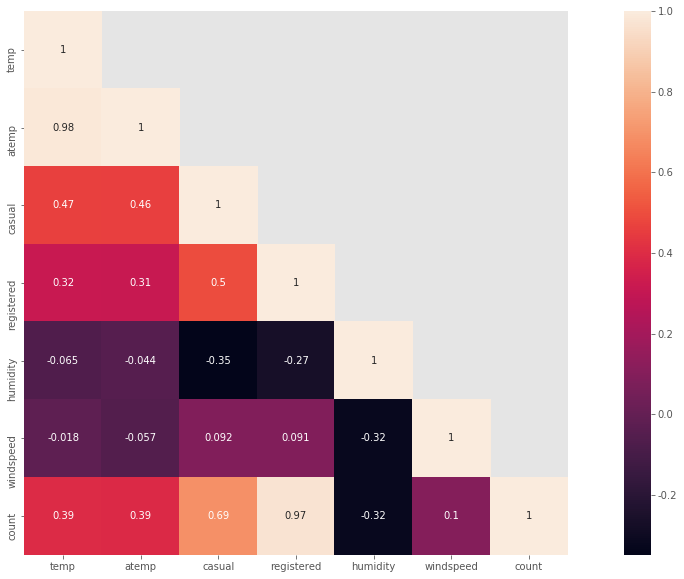

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(data=corrMatt,mask=mask, square=True, annot=True)

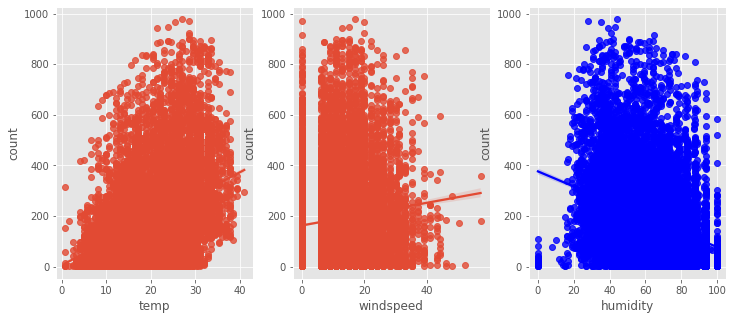

In [14]:
fig, axes = plt.subplots(ncols=3)
fig.set_size_inches(12,5)
sns.regplot(x="temp",y="count",data=train,ax=axes[0])
sns.regplot(x="windspeed",y="count",data=train,ax=axes[1])
sns.regplot(x="humidity",y="count",data=train,ax=axes[2],color="blue")

In [15]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train["year_month"] = train["datetime"].apply(concatenate_year_month)

print(train.shape)
train[["datetime", "year_month"]].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


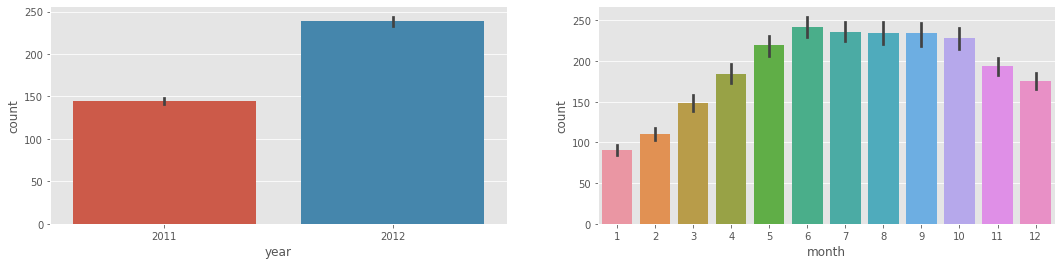

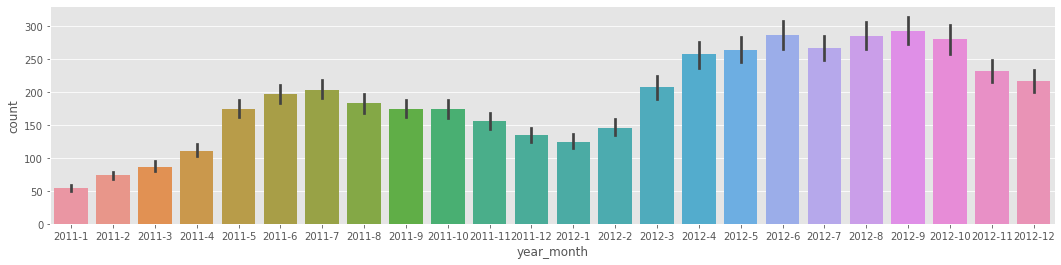

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18,4)

sns.barplot(data=train, x="year",y="count",ax=axes[0])
sns.barplot(data=train, x="month", y="count",ax=axes[1])

fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18,4)

sns.barplot(data=train, x="year_month",y="count",ax=axes)

In [17]:
#outliers 제거
trainWithoutOutliers = train[np.abs(train["count"]-train["count"].mean()) <= (3*train["count"].std())]
print(train.shape)
print(trainWithoutOutliers.shape)

(10886, 20)
(10739, 20)


C:\Users\somiz\anaconda3\envs\tensor\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\somiz\anaconda3\envs\tensor\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.3486990121229776, 4.562423868087808, 0.9581176780909612))

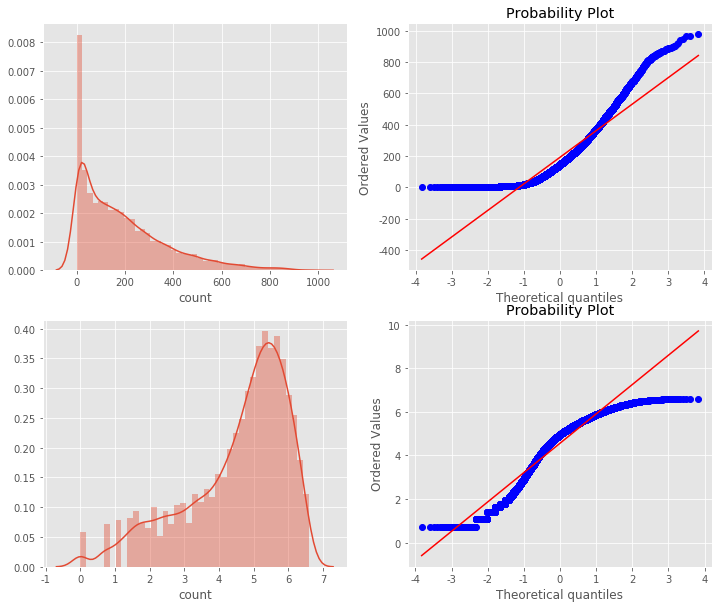

In [18]:
figure, axes = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(12,10)

sns.distplot(train["count"], ax=axes[0][0])
stats.probplot(train["count"],dist="norm", fit=True, plot=axes[0][1])
sns.distplot(np.log(trainWithoutOutliers["count"]), ax=axes[1][0])
stats.probplot(np.log1p(trainWithoutOutliers["count"]),dist="norm",fit=True,plot=axes[1][1])


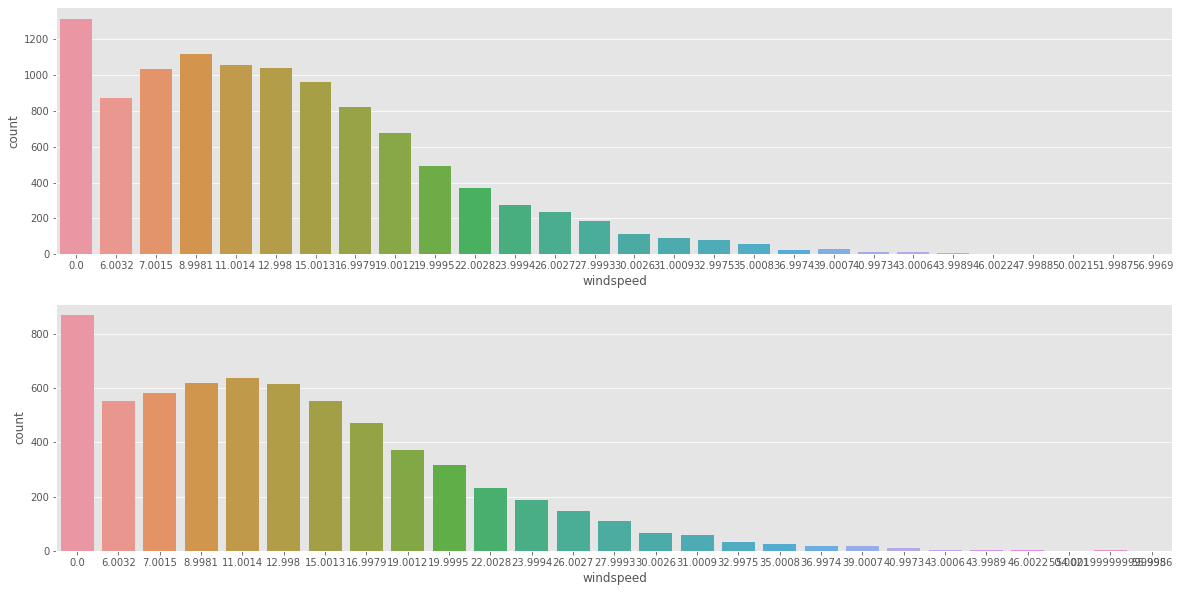

In [19]:
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(20,10)

sns.countplot(data=train,x="windspeed",ax=axes[0])
sns.countplot(data=test,x="windspeed",ax=axes[1])

In [20]:
#풍속을 머신러닝으로 예측해서 넣어주자
from sklearn.ensemble import RandomForestClassifier
def predict_wind(data):
    data["windspeed"] = data["windspeed"].astype("float")
    dataWind0 = data.loc[data["windspeed"] == 0]
    dataWindNot0 = data.loc[data["windspeed"] != 0]
    
    wCol=["season","weather","humidity","month","temp","year","atemp"]
    
    dataWindNot0["windspeed"] = dataWindNot0["windspeed"].astype("str")
    
    rfModel_wind = RandomForestClassifier()
    rfModel_wind.fit(dataWindNot0[wCol], dataWindNot0["windspeed"])
    wind0Values = rfModel_wind.predict(X=dataWind0[wCol])
    
    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0
    
    predictWind0["windspeed"] = wind0Values
    
    data = predictWindNot0.append(predictWind0)
    data["windspeed"] = data["windspeed"].astype("float")
    data.reset_index(inplace=True)
    data.drop("index",inplace=True,axis=1)
    return data

C:\Users\somiz\anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\somiz\anaconda3\envs\tensor\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\somiz\anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

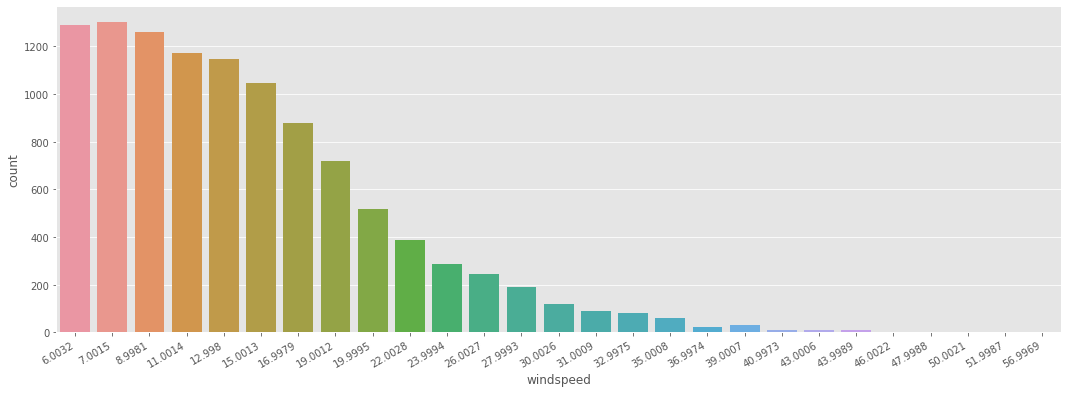

In [21]:
train = predict_wind(train)

fig, axes = plt.subplots()
fig.set_size_inches(18,6)

plt.sca(axes)
plt.xticks(rotation=30,ha="right")
axes.set(ylabel="count",xlabel="train windspeed")
sns.countplot(data=train,x="windspeed",ax=axes)

#풍속을 정규분포를 이용해서 예측해보자

In [24]:
categorical_feature_names = ["season","holiday","workingday","weather",
                            "dayofweek","month","year","hour"]
for var in categorical_feature_names:
    train[var] = train[var].astype("category")
    test[var] = test[var].astype("category")

In [25]:
feature_names = ["season","weather","temp","atemp","holiday",
                "windspeed","year","hour","dayofweek","holiday",
                "workingday"]


In [26]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 11)


,season,weather,temp,atemp,holiday,windspeed,year,hour,dayofweek,holiday,workingday
0,1,2,9.84,12.880,0,6.0032,2011,5,5,0,0
1,1,1,15.58,19.695,0,16.9979,2011,10,5,0,0
2,1,1,14.76,16.665,0,19.0012,2011,11,5,0,0
3,1,1,17.22,21.210,0,19.0012,2011,12,5,0,0
4,1,2,18.86,22.725,0,19.9995,2011,13,5,0,0


In [27]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 11)


,season,weather,temp,atemp,holiday,windspeed,year,hour,dayofweek,holiday,workingday
0,1,1,10.66,11.365,0,26.0027,2011,0,3,0,1
1,1,1,10.66,13.635,0,0.0000,2011,1,3,0,1
2,1,1,10.66,13.635,0,0.0000,2011,2,3,0,1
3,1,1,10.66,12.880,0,11.0014,2011,3,3,0,1
4,1,1,10.66,12.880,0,11.0014,2011,4,3,0,1


In [30]:
label_name = "count"
Y_train = train[label_name]
print(Y_train.shape)
Y_train.head()

(10886,)


0     1
1    36
2    56
3    84
4    94
Name: count, dtype: int64

In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [34]:
from sklearn.ensemble import RandomForestRegressor
max_depth_list=[]
model = RandomForestRegressor(n_estimators=100, n_jobs=1, random_state=0)

In [45]:
from sklearn.metrics import make_scorer
def rmsle(predict,real):
    p_v = np.array(predict)
    r_v = np.array(real)
    
    logp = np.log1p(p_v)
    logr = np.log1p(real)
    
    d = logp-logr
    d=np.square(d)
    md = d.mean()
    sc = np.sqrt(md)
    return sc
rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [46]:
%time score = cross_val_score(model, X_train, Y_train, cv=k_fold,scoring = rmsle_scorer)
score = score.mean()
print(score)

Wall time: 30.9 s
0.33724457685211534


In [48]:
model.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [50]:
predictions = model.predict(X_test)
print(predictions.shape)
predictions[:10]

(6493,)


array([ 13.495     ,   5.22      ,   3.79      ,   2.86      ,
         2.66      ,   6.34333333,  35.92      , 105.42      ,
       239.06      , 136.2       ])

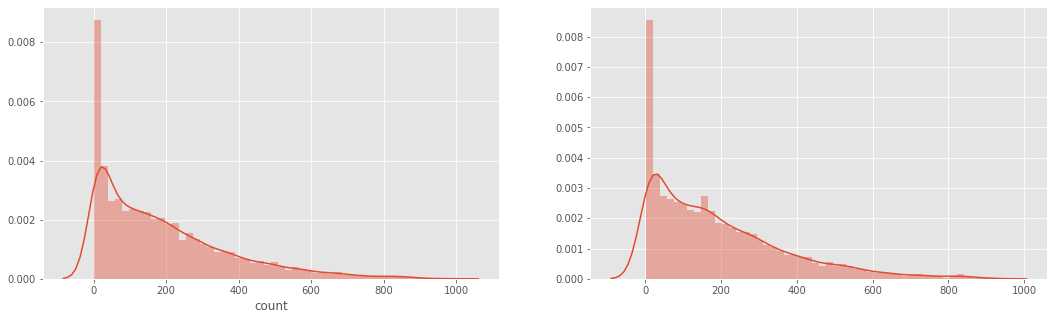

In [52]:
fig, axes=plt.subplots(ncols=2)
fig.set_size_inches(18,5)

sns.distplot(Y_train, ax=axes[0],bins=50)
sns.distplot(predictions, ax=axes[1],bins=50)

In [54]:
submission = pd.read_csv("./bike-sharing-demand/sampleSubmission.csv")
submission

submission["count"] = predictions

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,13.495
1,2011-01-20 01:00:00,5.220
2,2011-01-20 02:00:00,3.790
3,2011-01-20 03:00:00,2.860
4,2011-01-20 04:00:00,2.660


In [55]:
submission.to_csv("./bike-sharing-demand/score{0:.5f}_submission.csv".format(score),index=False)